In [1]:
# Import the necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import joblib

In [2]:
# Load the dataset
data = pd.read_csv('Crop_recommendation_Dataset.csv')

In [3]:
# Standardize the data while keeping the feature names
scaler = StandardScaler()
data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']] = scaler.fit_transform(data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])

In [5]:
# Standardize the data
features = scaler.fit_transform(data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])

# Initialize the PCA object
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)


In [6]:
# Cluster the data
kmeans = KMeans(n_clusters=20)
kmeans.fit(data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])
kmeans.fit(pca_result)


c:\Users\VIRAT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\VIRAT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=20)

In [7]:
# Analyze the clusters
cluster_labels = kmeans.labels_

In [8]:
# Define the number of clusters
num_clusters = 20

# Initialize lists to store cluster statistics
cluster_means = []
cluster_stds = []

for cluster_id in range(num_clusters):
    cluster_data = pca_result[cluster_labels == cluster_id]
    cluster_mean = np.mean(cluster_data, axis=0)
    cluster_std = np.std(cluster_data, axis=0)
    cluster_means.append(cluster_mean)
    cluster_stds.append(cluster_std)


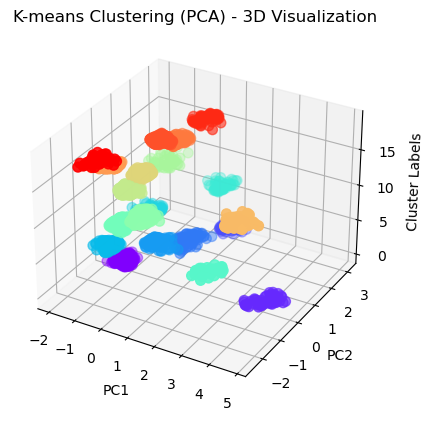

In [9]:
# Create a 3D scatter plot of the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], cluster_labels, c=cluster_labels, s=50, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Cluster Labels')
ax.set_title('K-means Clustering (PCA) - 3D Visualization')
plt.show()

In [11]:
# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(data, x='N', y='P', z='K', color='label', text='label')
fig.update_layout(scene=dict(xaxis_title='N', yaxis_title='P', zaxis_title='K'))
fig.update_layout(title='K-means Clustering (PCA) - 3D Visualization')
fig.show()

In [12]:
# Replace 'user_input' with the actual user input data
user_input = np.array(['label'])  # Convert user input to a numpy array
user_input_standardized = scaler.transform(user_input)

# Predict the cluster label for the user input data
predicted_cluster = kmeans.predict(user_input_standardized)
print(f"Predicted Cluster Label: {predicted_cluster[0]}")

# Replace 'your_model.pkl' with the file path where you want to save the model
model_filename = 'CR_PCR_7E_2.pkl'

# Save the K-means model
joblib.dump(kmeans, model_filename)

print(f"Model saved as {model_filename}")

c:\Users\VIRAT\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



ValueError: could not convert string to float: 'label'

In [ ]:
# Replace 'your_model.pkl' with the file path where you want to save the model
model_filename = 'CR_PCR_7E.pkl'

# Save the K-means model
joblib.dump(kmeans, model_filename)

print(f"Model saved as {model_filename}")